# Day 2, Session 3, Amir Haji-Akbari

## [REMINDER] Update the GitHub rep

<font color='red'>**Make sure not to overwrite any files. Either rename the old folder the clone the rep again, or just clone the rep in another location**</font>

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">

\> mv 7th_workshop_MD/ 7th_workshop_MD_old/
\> git clone https://github.com/icomse/7th_workshop_MD
\> cd 7th_workshop_MD/day_two/session3/

\> tree *

</code></pre>
</div>

Systems:
- LJ Bulk
- Water Bulk
    - TIP3P
    - TIP4P
    - TIP4P/2005
    - SPC/E
    
LAMMPS version: 2 august 2023

# Tutorial: Simulating LJ Bulk in LAMMPS


First, we'll initialize LAMMPS and set up the necessary parameters.

### Equilibration

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">

#### Specify basic aspects of the simulation
units lj		# Units for quantities. (lj = reduced units)
atom_style atomic	# What features does each atom have?
boundary p p p 		# Boundary conditions in each dimension.

#### Prepare initial structure
lattice fcc 1.0
Lattice spacing in x,y,z = 1.5874011 1.5874011 1.5874011
region myBox block -0.5 5.5 -0.5 5.5 -0.5 5.5
create_box 1 myBox
Created orthogonal box = (-0.79370053 -0.79370053 -0.79370053) to (8.7307058 8.7307058 8.7307058)
  1 by 1 by 1 MPI processor grid
create_atoms 1 region myBox
Created 864 atoms
  using lattice units in orthogonal box = (-0.79370053 -0.79370053 -0.79370053) to (8.7307058 8.7307058 8.7307058)
  create_atoms CPU = 0.000 seconds

#### Specify the interatomic potential
pair_style lj/cut 2.5
pair_modify shift yes
pair_coeff 1 1 1.0 1.0 2.5

#### Integration details
mass 1 1.0
timestep 0.0025
fix ensFix all nvt temp 2.0 2.0 0.25
velocity all create 2.0 4928459 dist gaussian

</code></pre>
</div>

Then run equilibration

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">

#### Save the starting configuration.
write_data starting.dat.out
System init for write_data ...
Generated 0 of 0 mixed pair_coeff terms from geometric mixing rule
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 2.8
  ghost atom cutoff = 2.8
  binsize = 1.4, bins = 7 7 7
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: standard

#### Run the simulation.
thermo 100
run 100000

</code></pre>
</div>

### Running Producton

<div style="background-color: #f0f0f0; padding: 10px;">
<pre style="background-color: #f0f0f0;"><code style="background-color: #f0f0f0;">

### Step 1: Start an interactive job
srun -p RM-shared -n 1  --pty bash -I

### Step 2: Load modules, copy neccessary files
module load intel-compiler
module load intel-mpi
module load intel-mkl 
cp /ocean/projects/see220002p/shared/LAMMPS/bin/lmp_mpi .
cp /ocean/projects/see220002p/shared/LAMMPS/LJ-Bulk/in.nvt-generate-general .
cp /ocean/projects/see220002p/shared/LAMMPS/LJ-Bulk/in.nvt-general-rdf .

### Step 3: Generate a starting configuration
./lmp_mpi -in in.nvt-generate-general -v numDen ${rho} -v T_target ${T} -v eqSteps ${mySteps}

### Step 4: Start production run
./lmp_mpi -in in.nvt-general-rdf -v confFileName equil-rho${rho}-T${T}.dat.out -v T_target ${T} -v mySeed 2024${grpId} -v nRdfBins ${n} -v rdfCutoff ${rMax} -v tag prod-rho${rho} -v prodSteps 80000
</code></pre>
</div>

Can plot the RDF from the production run:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


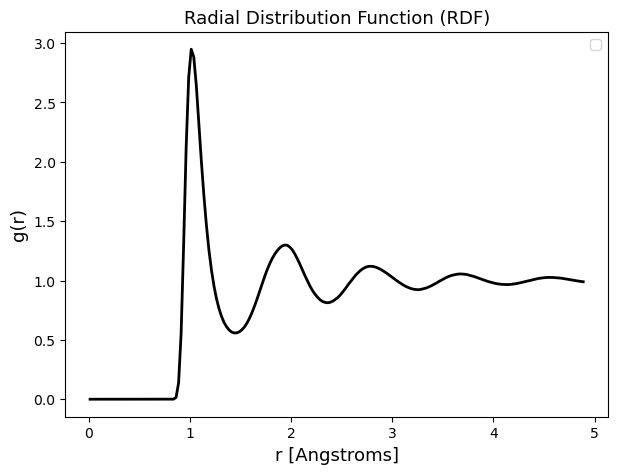

In [57]:
rdf_lj = np.loadtxt('prod-rho1.05-T2.rdf',skiprows=4)

plt.figure(figsize=(7,5))

plt.plot(rdf_lj[:,1], rdf_lj[:,2], color='black', linewidth=2) 

plt.xlabel('r [Angstroms]', fontsize=13)
plt.ylabel('g(r)', fontsize=13)
plt.title('Radial Distribution Function (RDF)', fontsize=13)
plt.legend(loc='upper right')

plt.show()